**Please download this notebook *(use the links above to find the source file)* and run the following installation script as a notebook.**

# Running MAGEMin calculations through Julia

PetThermoTools provides the ability to run calculations/models that utilize the recent Weller et al. (2024) and Green et al. (2025) thermodynamic models. Once everything is set up you should be able to run these calculations from the same functions used to run models with alphaMELTS, but simply setting the ```Model``` kwarg to ```Green2025``` or ```Weller2024```.

I've worked hard to try and ensure a set up routine that works on every operating system, regardless of prior installations etc. There is, however, a good chance you'll come across a bug/issue I haven't seen before. If there is an issue in the following script/functions please email me (gleesonm@berkeley.edu) and I will try to find a fix as quickly as possible!

The following notebook and functions will establish a new julia environment on your machine. From PetThermoTools v0.2.51 and later this environment will be activated whenever a MAGEMin calculation is initialized from Python. This should ensure that any prior julia installations/packages on your machine are not influenced by the following installation routine.

### Step 1 - install juliacall
Uncomment the line below and install juliacall in your Python environment

In [1]:
%pip install juliacall

### Step 2 - Install MAGEMin
Import PetThermoTools (install it if you haven't done so yet) and then use the inbuilt functions to install MAGEMin_C and MAGEMinCalc using the function below. You will need top uncomment the function to run it. If you've previously run this section successfully import PetThermoTools and then go to **Step 2b** to update the MAGEMinCalc and MAGEMin_C installations.

In [ ]:
# %pip install petthermotools #### If running on Victor uncomment this line to install petthermotools

In [2]:
import petthermotools as ptt
ptt.__version__  # should ve v0.3.2 or later

'0.2.50'

**This code installs MAGEMinCalc and underlying dependencies in julia and links them to the PetThermoTools installation. In a couple of cases the code below has caused the Python kernel to crash AFTER it completed. Therefore if a kernel crash message appears don't worry, just restart the kernel and procede to the test_MAGEMinCalc() function below (step 3).**

In [1]:
# ptt.install_MAGEMinCalc()

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


### Step 2b - Update MAGEMin
If you've previously run the cell above but need to update the MAGEMinCalc and MAGEMin_C versions following a PetThermoTools update, uncomment and run the cell below.

In [ ]:
# ptt.update_MAGEMinCalc()

### Step 3 - test the installation
Test the installation by running the following cell. This is calling the MAGEMinCalc functions directly with Julia code using juliacall. This is different to how the code is usually initiated in PetThermoTools but it provides an initial test of the installation. If successful it should print a Pandas DataFrame containing the predicted melt compositions in this crystallization example:

In [3]:
import petthermotools as ptt
ptt.test_MAGEMinCalc()

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


  Activating project at `~/.petthermotools_julia_env`


Using libMAGEMin.dylib from MAGEMin_jll
ig
        SiO2     Al2O3       CaO       MgO       FeO       K2O      Na2O  \
0   0.476276  0.164428  0.116295  0.094047  0.091816  0.003300  0.022550   
1   0.476311  0.164655  0.116482  0.093537  0.091797  0.003303  0.022572   
2   0.476372  0.164888  0.116645  0.093026  0.091774  0.003308  0.022591   
3   0.476457  0.165156  0.116821  0.092516  0.091697  0.003310  0.022631   
4   0.476543  0.165356  0.116959  0.092003  0.091674  0.003320  0.022656   
5   0.476600  0.165608  0.117127  0.091486  0.091618  0.003329  0.022694   
6   0.476679  0.165815  0.117307  0.090978  0.091546  0.003333  0.022732   
7   0.476789  0.166014  0.117475  0.090462  0.091522  0.003335  0.022770   
8   0.476880  0.166223  0.117647  0.089953  0.091484  0.003334  0.022805   
9   0.476950  0.166455  0.117817  0.089452  0.091448  0.003335  0.022832   
10  0.477000  0.166718  0.117983  0.088940  0.091416  0.003341  0.022873   
11  0.477076  0.166931  0.118146  0.088434  0

### Step 4 - Restart the kernel and test running calculations through PetThermoTools
Assuming the crystallization model above ran without any issues we can now progress to testing the integration of MAGEMin with PetThermoTools. First make sure you have the up to date version of PetThermoTools installed (v0.2.51 or later). Restart the kernel and then run the 3 cells below.

In [4]:
import petthermotools as ptt
ptt.__version__

'0.2.50'

In [5]:
comp = {"SiO2_Liq": 47.5, 
        "Al2O3_Liq": 16.4, 
        "CaO_Liq": 11.6, 
        "MgO_Liq": 9.38,
        "FeOt_Liq": 9.16, 
        "K2O_Liq": 0.329, 
        "Na2O_Liq": 2.25, 
        "TiO2_Liq": 2.29,
        "Fe3Fet_Liq": 0.15, 
        "Cr2O3_Liq": 0.0, 
        "H2O_Liq": 0.68}

Results = ptt.isobaric_crystallisation(bulk=comp,
                             Model = "Green2025",
                             dt_C = 2.0,
                             T_end_C=1100.0,
                             P_bar=1000.0,
                             find_liquidus=True,
                             Frac_solid=True)

Running Green2025 calculation...

 Complete (time taken = 37.55 seconds)

  Activating project at `~/.petthermotools_julia_env`


Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython
Using libMAGEMin.dylib from MAGEMin_jll
ig


Text(0, 0.5, 'FeO$_t$')

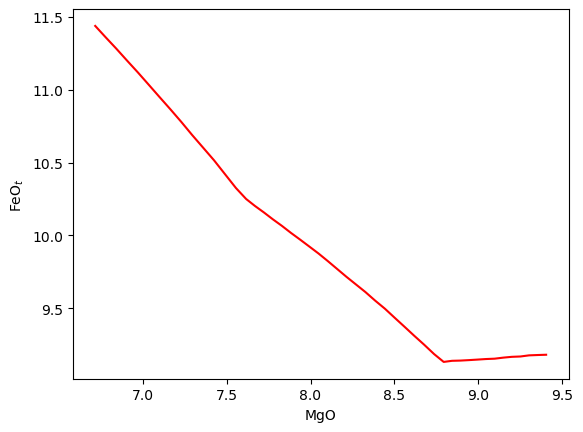

In [6]:
import matplotlib.pyplot as plt
plt.plot(Results["All"]["MgO_Liq"], Results["All"]["FeOt_Liq"], '-r')
plt.xlabel('MgO')
plt.ylabel('FeO$_t$')

### Step 5 - use PetThermoTools alongside MAGEMin in your research!